In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122,70.0,27.0,0.0,36.8,0.340,NaN,0.0
765,5.0,121,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [20]:
data.dropna(inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
6,3.0,78,50.0,32.0,88.0,31.0,0.248,26.0,1.0
...,...,...,...,...,...,...,...,...,...
761,9.0,170,74.0,31.0,0.0,44.0,0.403,43.0,1.0
762,9.0,89,62.0,0.0,0.0,22.5,0.142,33.0,0.0
763,10.0,101,76.0,48.0,180.0,32.9,0.171,63.0,0.0
765,5.0,121,72.0,23.0,112.0,26.2,0.245,30.0,0.0


array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>,
        <AxesSubplot: title={'center': 'Age'}>, <AxesSubplot: >]],
      dtype=object)

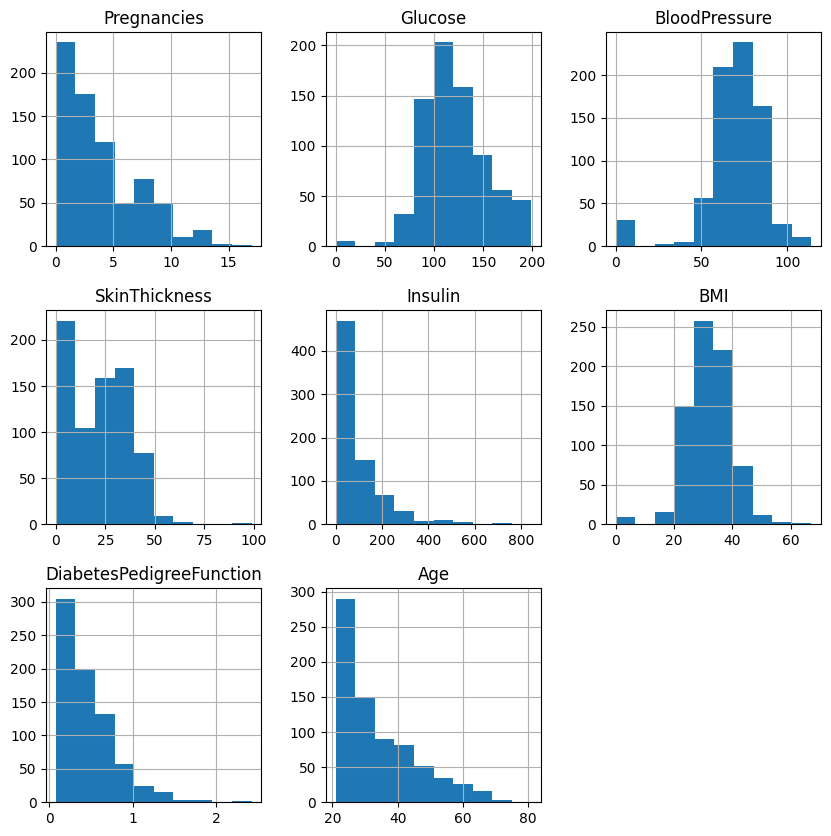

In [21]:
data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].hist(figsize=[10,10])

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
new_data=sc.fit_transform(data.drop(columns=['Outcome']))
df=pd.DataFrame(new_data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df, data['Outcome'])

In [24]:
from scipy.stats import mode

class KNNModel:
    def __init__(self):
        self.x_train=None
        self.y_train=None
        
    def fit(self,x_train, y_train):
        self.x_train=np.array(x_train)
        self.y_train=np.array(y_train)
        
    def euclidean(self, x, y):
        return np.sqrt(np.sum((x-y)**2))
    
    def predict(self, x_test,k):
        predicted=[]
        for test_data in x_test:
            distances= np.array([self.euclidean(test_data, train_data) for train_data in self.x_train])
            nearest_indices = np.argsort(distances)[:k]
            labels= self.y_train[nearest_indices]
            mode_label=mode(labels)
            mode_label=mode_label.mode[0]
            predicted.append(mode_label)
        return predicted
    
model=KNNModel()
model.fit(x_train,y_train)


In [25]:
from sklearn.metrics import accuracy_score
accuracy=[]
for k in range(1,10):
    y_pred=model.predict(np.array(x_test), k)
    acc= accuracy_score(y_test, y_pred)
    print("For k= {}, accuracy is {}".format(k,acc))
    accuracy.append(acc)
    



C:\Users\gbopa\AppData\Local\Temp\ipykernel_38756\335522581.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label=mode(labels)


For k= 1, accuracy is 0.6989247311827957


C:\Users\gbopa\AppData\Local\Temp\ipykernel_38756\335522581.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label=mode(labels)


For k= 2, accuracy is 0.7204301075268817


C:\Users\gbopa\AppData\Local\Temp\ipykernel_38756\335522581.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label=mode(labels)


For k= 3, accuracy is 0.7365591397849462


C:\Users\gbopa\AppData\Local\Temp\ipykernel_38756\335522581.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label=mode(labels)


For k= 4, accuracy is 0.7688172043010753


C:\Users\gbopa\AppData\Local\Temp\ipykernel_38756\335522581.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label=mode(labels)


For k= 5, accuracy is 0.8010752688172043


C:\Users\gbopa\AppData\Local\Temp\ipykernel_38756\335522581.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label=mode(labels)


For k= 6, accuracy is 0.8333333333333334


C:\Users\gbopa\AppData\Local\Temp\ipykernel_38756\335522581.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label=mode(labels)


For k= 7, accuracy is 0.8225806451612904


C:\Users\gbopa\AppData\Local\Temp\ipykernel_38756\335522581.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label=mode(labels)


For k= 8, accuracy is 0.8064516129032258


C:\Users\gbopa\AppData\Local\Temp\ipykernel_38756\335522581.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_label=mode(labels)


For k= 9, accuracy is 0.8225806451612904


<AxesSubplot: >

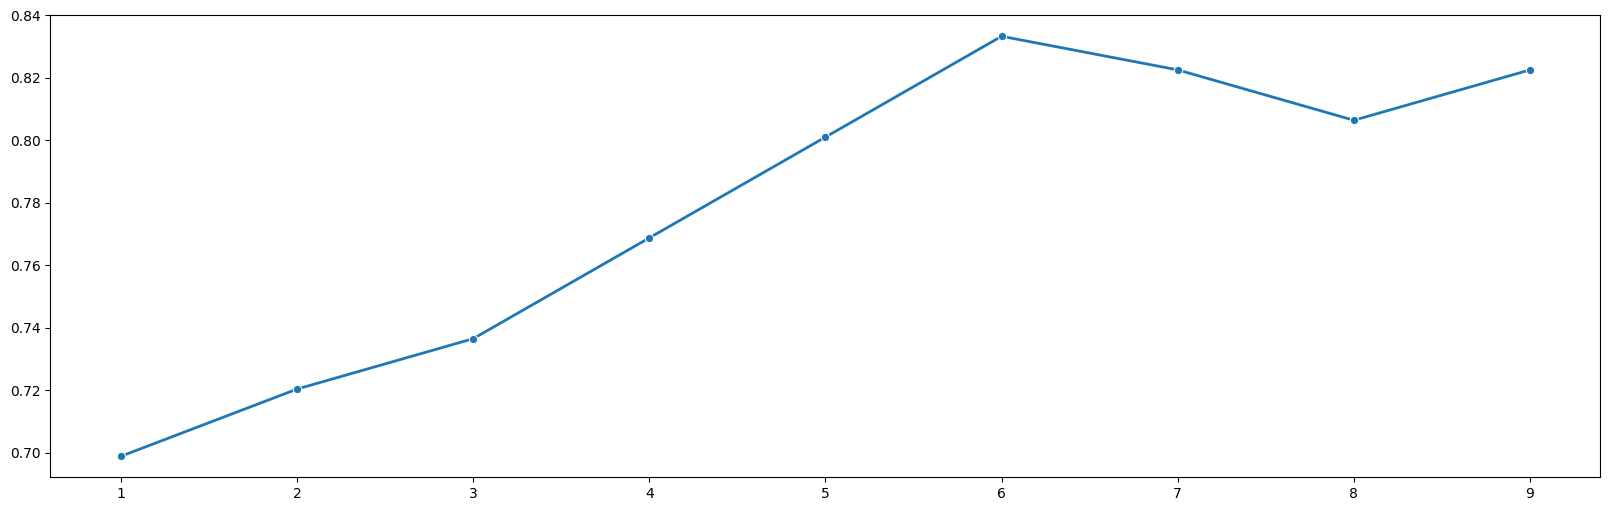

In [26]:
plt.figure(figsize=[20,6])
sns.lineplot(x=range(1,10), y=accuracy, lw=2, marker='o')